# Exploratory Data Analysis of Scam Reports

## Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from plotnine import ggplot, geom_point, aes, theme, element_text, scale_x_date
from mizani.breaks import date_breaks, minor_breaks
from mizani.formatters import date_format
from plotnine.ggplot import ggsave
%matplotlib inline

## Define functions

In [2]:
def read_csv(path):
    
    """This function reads a CSV file from a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path, nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

## Load the dataset

In [3]:
# Load dataset, with submission ID as the index
scam_df = read_csv("Data/scam_data_4.csv").set_index('submission_id')
scam_df = scam_df.drop(columns=['len_preprocessed_text', 'len_lemmatised'])

# Check first five rows...
scam_df.head()

,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,preprocessed_text,scammer_name,scammer_contact,stopwords_removed,lemmatised,scam_type
submission_id,,,,,,,,,,,,,,,
20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...,I only know the number,923329855137,call whatsapp strange number dbs bank logo con...,call whatsapp strange number dbs bank logo con...,Impersonation Scam
20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...,Ministry of law,6566309459,happened morning hrs received phone call numbe...,happen morning hrs receive phone call number r...,Phishing Scam
20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...,SIngtel,NaN,rceived call lady claiming calling singtel sta...,rceiv call lady claim call singtel start call ...,Phishing Scam
20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,details i received a call from what seemed lik...,Singapore high or supreme court,NaN,details received call seemed like singapore mo...,detail receive call seem like singapore mobile...,Impersonation Scam
20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,impersonated junior technical staff called hom...,impersonate junior technical staff call home s...,Phishing Scam


## Temporal Analysis

### Time-Series of Scam Report Submissions (14-Days Moving Average)

In [4]:
df_by_date = scam_df.groupby(by='date')['scam_type'].count().to_frame('count').reset_index()
df_by_date.set_index('date', inplace=True)
df_by_date.head()

,count
date,
2016-07-20,1
2016-07-21,1
2016-07-22,3
2016-07-23,3
2016-07-24,2


In [5]:
# 14 days moving average
df_by_date_ma = df_by_date['count'].rolling(window=14).mean().to_frame().dropna().reset_index()
df_by_date_ma.head()

,date,count
0,2016-08-02,2.785714
1,2016-08-03,2.928571
2,2016-08-04,3.214286
3,2016-08-05,3.071429
4,2016-08-07,3.000000


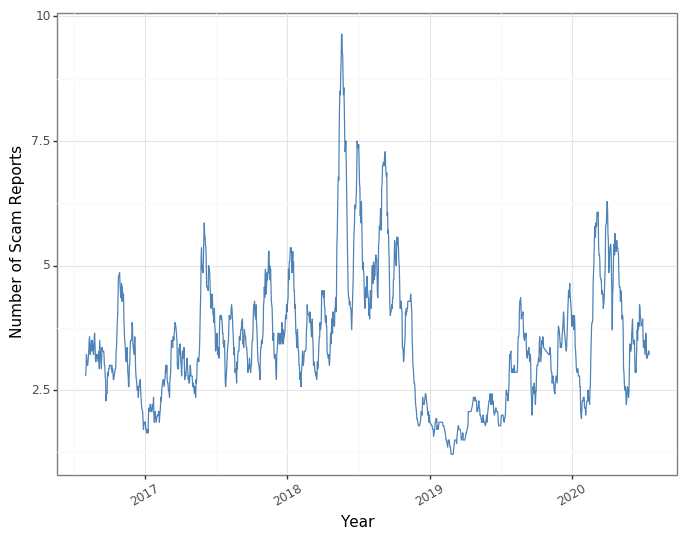

<ggplot: (-9223371909815241244)>

In [6]:
g1 = (p9.ggplot(data=df_by_date_ma, 
           mapping=p9.aes(x='date', y='count'))
+ p9.geom_line(alpha=0.7, color="#004d99")
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("Year") 
+ p9.scale_x_datetime(breaks = date_breaks('1 year'), labels=date_format('%Y'))
+ p9.theme(figure_size=(8, 6), axis_text_x = element_text(rotation=30)))

g1

In [7]:
# Save the plot
# g1.save("Figures/no_title_time_series_overall.png", width=10, height=5, dpi=800)

### Time-Series of Scam Report Submissions for Top 12 Scam Types (14-Days Moving Average)

In [8]:
df_by_date_top12 = scam_df.groupby(by=['scam_type', 'date'])['informant'].count().to_frame('count').reset_index()
df_by_date_top12['count'] = df_by_date_top12['count'].rolling(14).mean().fillna(0)

# Exclude minority scam types
df_by_date_top12 = df_by_date_top12[~df_by_date_top12['scam_type'].isin(["Wangiri Scam", "Car Rental Scam", "Others", "PayPal Email Scam", "Line/Facebook Scam", "Spoofed/Hacked Email Scam",
                                 "Online Travel Vacation Scam", "Kidnap Scam", "Inheritance Scam"])]

# Check first five rows...
df_by_date_top12.head()

,scam_type,date,count
1279,Credit-for-Sex Scam,2016-07-20,0.000000
1280,Credit-for-Sex Scam,2016-07-21,0.000000
1281,Credit-for-Sex Scam,2016-07-22,0.071429
1282,Credit-for-Sex Scam,2016-07-23,0.142857
1283,Credit-for-Sex Scam,2016-07-24,0.142857


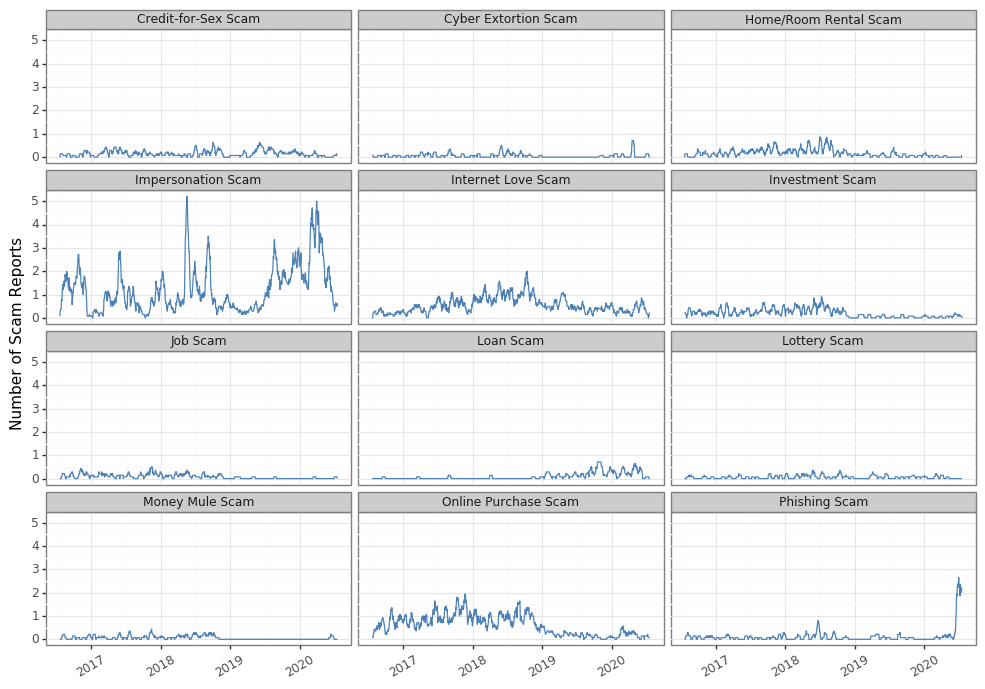

<ggplot: (-9223371909814461296)>

In [9]:
g2 = (p9.ggplot(data=df_by_date_top12, 
           mapping=p9.aes(x='date', y='count'))
+ p9.geom_line(alpha=0.7, color="#004d99")
+ p9.facet_wrap("scam_type", ncol=3) 
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("") 
+ p9.scale_x_datetime(breaks = date_breaks('1 year'), labels=date_format('%Y'))
+ p9.theme(figure_size=(12, 8), axis_text_x = element_text(rotation=30)))

g2

In [10]:
# Save the plot
# g2.save("Figures/no_title_facet_wrap.png", width=12, height=8, dpi=800)

## Statistical Summaries of Scam Report Submissions

### Aggregated by Year

In [11]:
df_by_year = scam_df.groupby(by='year')['scam_type'].count().to_frame('count').reset_index()
df_by_year

,year,count
0,2016,442
1,2017,1180
2,2018,1547
3,2019,683
4,2020,702


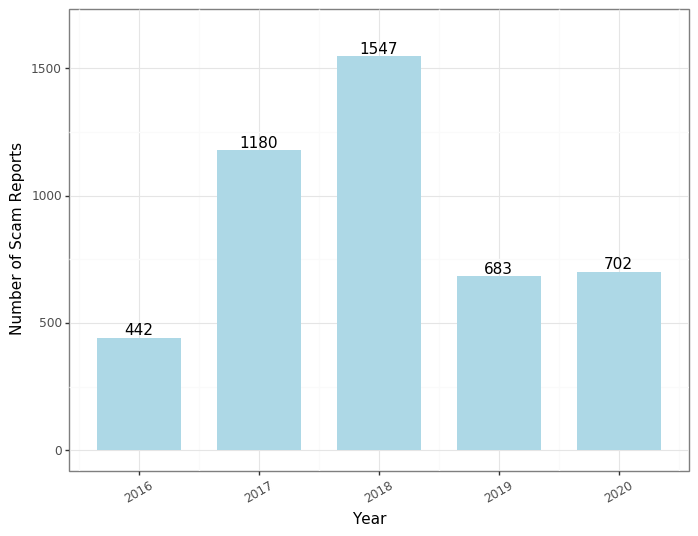

<ggplot: (-9223371909814711700)>

In [12]:
g3 = (p9.ggplot(data=df_by_year, 
           mapping=p9.aes(x='year', y='count'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("Year") 
+ p9.ylim(0, 1650)
+ p9.geom_text(p9.aes(label='count'), va='bottom', nudge_y=0.125)
+ p9.theme(figure_size=(8, 6), axis_text_x = element_text(rotation=30)))

g3

In [13]:
# Save the plot
# g3.save("Figures/no_title_aggregated_by_year.png", width=5, height=5, dpi=800)

### Aggregated by Month

In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

df_by_month = scam_df.groupby(by=['year', 'month'])['scam_type'].count().to_frame().reset_index().pivot(index = 'month', columns='year', values='scam_type')
df_by_month = df_by_month.reset_index()
df_by_month['total'] = df_by_month.sum(axis=1)
df_by_month['month'].cat.set_categories(new_categories=month_order, ordered=True, inplace=True)
df_by_month['month_cat'] = df_by_month['month'].cat.codes
df_by_month = df_by_month.sort_values('month_cat').reset_index().drop(columns=['index'])
df_by_month

year,month,2016,2017,2018,2019,2020,total,month_cat
0,January,0,59,127,28,69,283,0
1,February,0,63,86,20,112,281,1
2,March,0,95,106,40,156,397,2
3,April,0,84,103,39,138,364,3
4,May,0,119,236,47,84,486,4
5,June,0,113,167,49,94,423,5
6,July,30,105,135,71,49,390,6
7,August,84,105,179,100,0,468,7
8,September,82,92,155,75,0,404,8
9,October,97,110,139,56,0,402,9


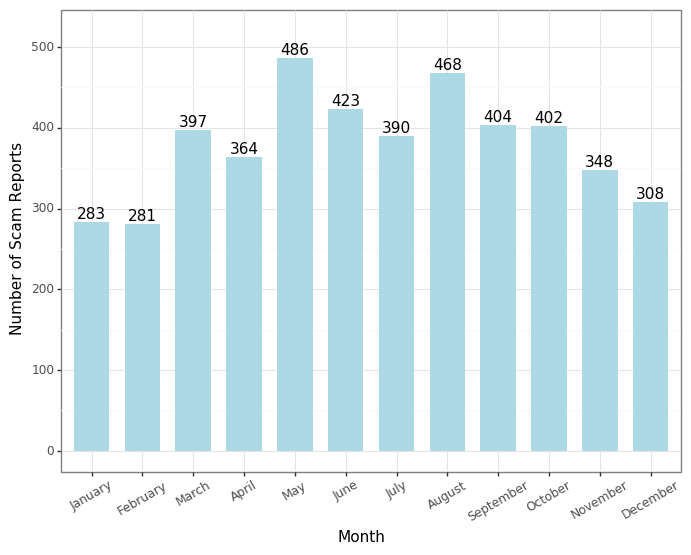

<ggplot: (-9223371909814554980)>

In [15]:
g4 = (p9.ggplot(data=df_by_month, 
           mapping=p9.aes(x='month', y='total'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("Month") 
+ p9.ylim(0, 520)
# + p9.ggtitle("Number of Scam Reports Aggregated by Month")
+ p9.geom_text(p9.aes(label='total'), va='bottom', nudge_y=0.125)
+ p9.theme(figure_size=(8, 6), axis_text_x = element_text(rotation=30)))

g4

In [16]:
# Save the plot
# g4.save("Figures/no_title_aggregated_by_month.png", width=5, height=5, dpi=800)

### Aggregated by Day of the Week

In [17]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_by_day = scam_df.groupby(by='day')['scam_type'].count().to_frame('count').reset_index()
df_by_day['day'].cat.set_categories(new_categories=day_order, ordered=True, inplace=True)
df_by_day['day_cat'] = df_by_day['day'].cat.codes
df_by_day = df_by_day.sort_values('day_cat').reset_index().drop(columns=['index'])
df_by_day

,day,count,day_cat
0,Sunday,442,0
1,Monday,693,1
2,Tuesday,793,2
3,Wednesday,754,3
4,Thursday,709,4
5,Friday,689,5
6,Saturday,474,6


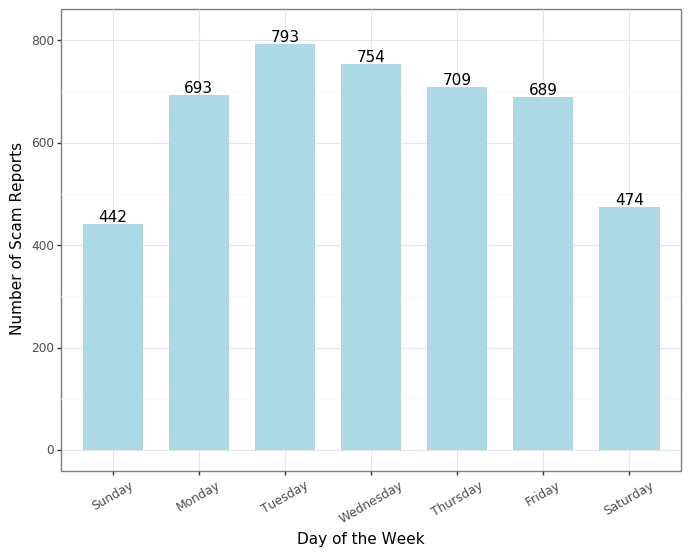

<ggplot: (-9223371909814499116)>

In [18]:
g5 = (p9.ggplot(data=df_by_day, 
           mapping=p9.aes(x='day', y='count'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("Day of the Week") 
+ p9.ylim(0, 820)
+ p9.geom_text(p9.aes(label='count'), va='bottom', nudge_y=0.125)
+ p9.theme(figure_size=(8, 6), axis_text_x = element_text(rotation=30)))

g5

In [19]:
# Save the plot
# g5.save("Figures/no_title_aggregated_by_day.png", width=5, height=5, dpi=800)

### Daily Average by Year

In [20]:
df_by_n_days = scam_df.groupby(by='year')['date'].nunique().to_frame('n_days').reset_index()
df_by_daily_avg = pd.merge(df_by_year, df_by_n_days)
df_by_daily_avg['daily_avg'] = round(df_by_daily_avg['count']/df_by_daily_avg['n_days'], 2)
df_by_daily_avg

,year,count,n_days,daily_avg
0,2016,442,144,3.07
1,2017,1180,345,3.42
2,2018,1547,345,4.48
3,2019,683,263,2.60
4,2020,702,182,3.86


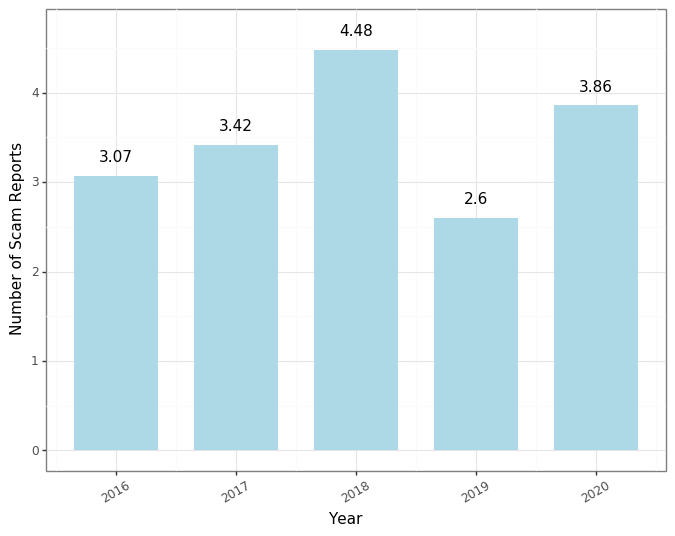

<ggplot: (-9223371909815221044)>

In [21]:
g6 = (p9.ggplot(data=df_by_daily_avg, 
           mapping=p9.aes(x='year', y='daily_avg'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("Year") 
+ p9.ylim(0, 4.7)
# + p9.ggtitle("Daily Average Number of Scam Reports")
+ p9.geom_text(p9.aes(label='daily_avg'), va='bottom', nudge_y=0.125)
+ p9.theme(figure_size=(8, 6), axis_text_x = element_text(rotation=30)))

g6

In [22]:
# Save the plot
# g6.save("Figures/no_title_daily_average.png", width=5, height=5, dpi=800)

### Most Common Scam Types

In [23]:
df_common = scam_df.groupby(['scam_type'])['scam_type'].count().to_frame('count').reset_index()
df_common = df_common.sort_values(by='count', ascending=False)
df_common['scam_type_cat'] = [i for i in range(len(df_common['scam_type']))]
df_common = df_common.reset_index().drop(columns='index')
df_common.head()

,scam_type,count,scam_type_cat
0,Impersonation Scam,1611,0
1,Online Purchase Scam,812,1
2,Internet Love Scam,707,2
3,Investment Scam,264,3
4,Home/Room Rental Scam,227,4


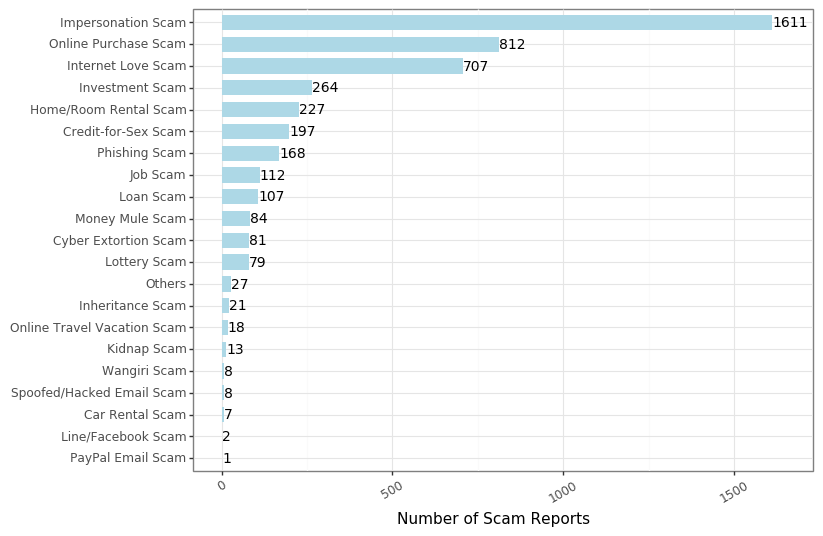

<ggplot: (-9223371909814510588)>

In [24]:
g7 = (p9.ggplot(data=df_common, 
           mapping=p9.aes(x='scam_type', y='count'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_minimal() 
+ p9.theme_bw() 
+ p9.xlab("")
+ p9.ylab("Number of Scam Reports")
+ p9.coord_flip()
+ p9.ylim(0, 1650)
+ p9.geom_text(p9.aes(label='count'), ha='left', va='center', size=10)
+ p9.theme(figure_size=(8, 6), axis_text_x = element_text(rotation=30))
+ p9.scale_x_discrete(limits=list(df_common.scam_type)[::-1]))

g7

In [25]:
# Save the plot
# g7.save("Figures/no_title_by_scam_types.png", width=10, height=5, dpi=800)

### Top 5 Scam Types by Year

In [26]:
df_top5 = scam_df.groupby(['year', 'scam_type'], as_index=False).count()[['year', 'scam_type', 'informant']]
df_top5.columns = ['year', 'scam_type', 'count']

df_top5 = df_top5.sort_values(by='count', ascending=False).groupby('year').head(5).sort_values('year')
df_top5['count'] = df_top5['count'].astype(int)
df_top5['scam_type'] = df_top5['scam_type'].astype(str)
df_top5 = df_top5.sort_values(['year', 'count'], ascending=[True, True])
df_top5['scam_type_pa'] = df_top5['year'].astype(str) + df_top5['scam_type']
df_top5.head()

,year,scam_type,count,scam_type_pa
8,2016,Job Scam,22,2016Job Scam
7,2016,Investment Scam,30,2016Investment Scam
6,2016,Internet Love Scam,31,2016Internet Love Scam
14,2016,Online Purchase Scam,96,2016Online Purchase Scam
4,2016,Impersonation Scam,180,2016Impersonation Scam


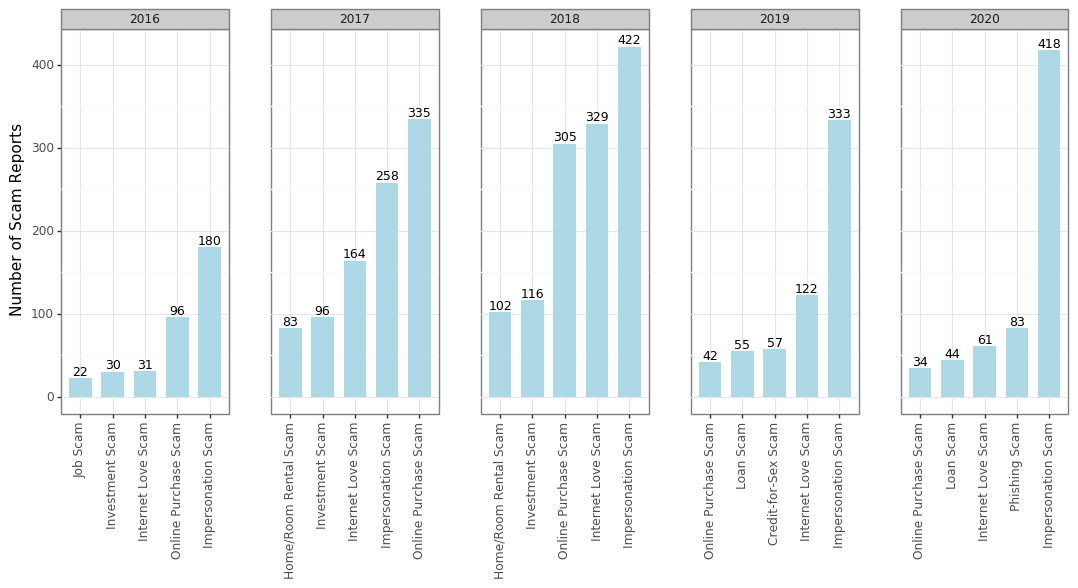

<ggplot: (-9223371909813779108)>

In [27]:
g8 = (p9.ggplot(data=df_top5, 
           mapping=p9.aes(x='reorder(scam_type_pa, count)', y='count'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.facet_wrap("~year", ncol=5, scales='free_x')
+ p9.theme_bw() 
+ p9.ylab("Number of Scam Reports")
+ p9.xlab("") 
+ p9.theme(subplots_adjust={'wspace': 0.25}, figure_size=(13, 5), axis_text_x = p9.element_text(rotation=90))
+ p9.scale_x_discrete(labels=lambda lbls : [s[4:] for s in lbls])
+ p9.geom_text(p9.aes(label='count'), ha='center', va='bottom', size=9)
)

g8

In [28]:
# Save the plot
# g8.save("Figures/no_title_top5.png", width=10, height=5, dpi=800)